In [ ]:
!git clone https://github.com/AndrewDiv/FCALC

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

import FCALC.fcalc as fcalc

# DATASET 1: Loan Default

In [2]:
df = pd.read_csv('Loan_default_data.csv')
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [9]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [3]:
df = df.sample(n=5000, random_state=42)
df.shape

(5000, 18)

In [4]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
51139,CKV34LU7V7,55,112656,92393,581,113,2,23.54,36,0.15,PhD,Self-employed,Single,Yes,Yes,Home,No,0
71005,62KTYNH93J,56,91569,131575,641,54,1,15.19,12,0.43,High School,Part-time,Divorced,Yes,Yes,Education,Yes,0
35684,JGFUSOIUH7,26,78169,75417,569,105,3,18.02,12,0.29,Master's,Part-time,Married,Yes,Yes,Education,Yes,0
174087,4538THBHOX,26,63033,10804,326,118,1,14.71,24,0.41,High School,Part-time,Single,No,No,Business,Yes,0
137952,DXLNA06JHR,24,29665,21182,662,102,3,15.02,60,0.69,PhD,Unemployed,Single,No,Yes,Business,Yes,0


## LazyFCA (Patternized)

In [81]:
X = df.drop(['Default', 'LoanID'], axis=1)
y = df['Default']

In [82]:
X = pd.get_dummies(X, drop_first=True)
X

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_High School,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,56,85994,50587,520,80,4,15.23,36,0.44,0,...,0,0,0,1,1,0,0,0,1,1
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,0,1,0,0,0,0,0,0,1,1
2,46,84208,129188,451,26,3,21.17,24,0.31,0,...,1,0,0,1,1,0,0,0,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,1,...,0,1,0,0,0,1,0,0,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,0,...,0,1,0,0,0,0,0,0,1,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,1,...,0,0,0,0,0,0,0,1,0,0
255344,56,84820,208294,597,70,3,5.29,60,0.50,1,...,0,1,0,1,1,0,0,0,0,1
255345,42,85109,60575,809,40,1,20.90,48,0.44,1,...,0,0,1,1,1,0,0,0,1,0


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [78]:
# alpha hyperparameter may be varied
bin_cls = fcalc.classifier.PatternBinaryClassifier(X_train.values, y_train.to_numpy(), method='standard', alpha=0.1)

In [ ]:
bin_cls.predict(X_test.values)
print(accuracy_score(y_test, bin_cls.predictions))
print(f1_score(y_test, bin_cls.predictions))

## LazyFCA (Binarized)

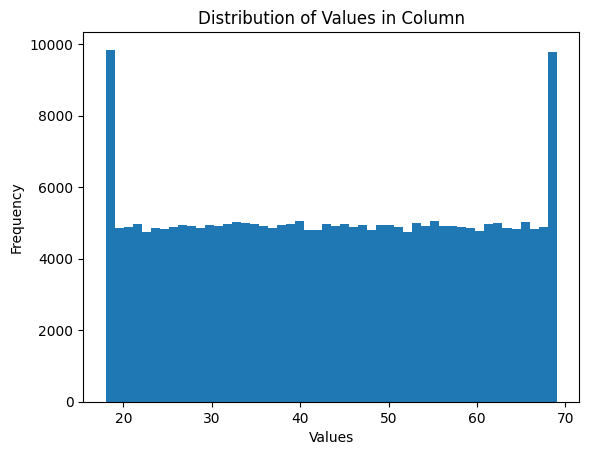

In [8]:
plt.hist(df['Age'], bins=50)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Values in Column')
plt.show()

In [5]:
df['Age25'] = df['Age'].apply(lambda x: 1 if 18 <= x <= 25 else 0)
df['Age35'] = df['Age'].apply(lambda x: 1 if 25 < x <= 35 else 0)
df['Age50'] = df['Age'].apply(lambda x: 1 if 35 < x <= 50 else 0)

q1 = df['Income'].quantile(0.25)
q2 = df['Income'].quantile(0.5)
q3 = df['Income'].quantile(0.75)
df['Income25'] = df['Income'].apply(lambda x: 1 if 0 <= x <= q1 else 0)
df['Income50'] = df['Income'].apply(lambda x: 1 if q1 < x <= q2 else 0)
df['Income75'] = df['Income'].apply(lambda x: 1 if q2 < x <= q3 else 0)

q1 = df['LoanAmount'].quantile(0.25)
q2 = df['LoanAmount'].quantile(0.5)
q3 = df['LoanAmount'].quantile(0.75)
df['LoanAmount25'] = df['LoanAmount'].apply(lambda x: 1 if 0 <= x <= q1 else 0)
df['LoanAmount50'] = df['LoanAmount'].apply(lambda x: 1 if q1 < x <= q2 else 0)
df['LoanAmount75'] = df['LoanAmount'].apply(lambda x: 1 if q2 < x <= q3 else 0)

q1 = df['CreditScore'].quantile(0.25)
q2 = df['CreditScore'].quantile(0.5)
q3 = df['CreditScore'].quantile(0.75)
df['CreditScore25'] = df['CreditScore'].apply(lambda x: 1 if 0 <= x <= q1 else 0)
df['CreditScore50'] = df['CreditScore'].apply(lambda x: 1 if q1 < x <= q2 else 0)
df['CreditScore75'] = df['CreditScore'].apply(lambda x: 1 if q2 < x <= q3 else 0)

q1 = df['MonthsEmployed'].quantile(0.25)
q2 = df['MonthsEmployed'].quantile(0.5)
q3 = df['MonthsEmployed'].quantile(0.75)
df['MonthsEmployed25'] = df['MonthsEmployed'].apply(lambda x: 1 if 0 <= x <= q1 else 0)
df['MonthsEmployed50'] = df['MonthsEmployed'].apply(lambda x: 1 if q1 < x <= q2 else 0)
df['MonthsEmployed75'] = df['MonthsEmployed'].apply(lambda x: 1 if q2 < x <= q3 else 0)

q1 = df['NumCreditLines'].quantile(0.25)
q2 = df['NumCreditLines'].quantile(0.5)
q3 = df['NumCreditLines'].quantile(0.75)
df['NumCreditLines25'] = df['NumCreditLines'].apply(lambda x: 1 if 0 <= x <= q1 else 0)
df['NumCreditLines50'] = df['NumCreditLines'].apply(lambda x: 1 if q1 < x <= q2 else 0)
df['NumCreditLines75'] = df['NumCreditLines'].apply(lambda x: 1 if q2 < x <= q3 else 0)

q1 = df['InterestRate'].quantile(0.25)
q2 = df['InterestRate'].quantile(0.5)
q3 = df['InterestRate'].quantile(0.75)
df['InterestRate25'] = df['InterestRate'].apply(lambda x: 1 if 0 <= x <= q1 else 0)
df['InterestRate50'] = df['InterestRate'].apply(lambda x: 1 if q1 < x <= q2 else 0)
df['InterestRate75'] = df['InterestRate'].apply(lambda x: 1 if q2 < x <= q3 else 0)

q1 = df['LoanTerm'].quantile(0.25)
q2 = df['LoanTerm'].quantile(0.5)
q3 = df['LoanTerm'].quantile(0.75)
df['LoanTerm25'] = df['LoanTerm'].apply(lambda x: 1 if 0 <= x <= q1 else 0)
df['LoanTerm50'] = df['LoanTerm'].apply(lambda x: 1 if q1 < x <= q2 else 0)
df['LoanTerm75'] = df['LoanTerm'].apply(lambda x: 1 if q2 < x <= q3 else 0)

q1 = df['DTIRatio'].quantile(0.25)
q2 = df['DTIRatio'].quantile(0.5)
q3 = df['DTIRatio'].quantile(0.75)
df['DTIRatio25'] = df['DTIRatio'].apply(lambda x: 1 if 0 <= x <= q1 else 0)
df['DTIRatio50'] = df['DTIRatio'].apply(lambda x: 1 if q1 < x <= q2 else 0)
df['DTIRatio75'] = df['DTIRatio'].apply(lambda x: 1 if q2 < x <= q3 else 0)

df.head(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,NumCreditLines75,InterestRate25,InterestRate50,InterestRate75,LoanTerm25,LoanTerm50,LoanTerm75,DTIRatio25,DTIRatio50,DTIRatio75
51139,CKV34LU7V7,55,112656,92393,581,113,2,23.54,36,0.15,...,0,0,0,0,0,1,0,1,0,0
71005,62KTYNH93J,56,91569,131575,641,54,1,15.19,12,0.43,...,0,0,0,1,1,0,0,0,1,0
35684,JGFUSOIUH7,26,78169,75417,569,105,3,18.02,12,0.29,...,1,0,0,1,1,0,0,1,0,0
174087,4538THBHOX,26,63033,10804,326,118,1,14.71,24,0.41,...,0,0,0,1,1,0,0,0,1,0
137952,DXLNA06JHR,24,29665,21182,662,102,3,15.02,60,0.69,...,1,0,0,1,0,0,0,0,0,1
137678,GPXN95JGCL,41,98511,187008,731,20,4,14.88,36,0.46,...,0,0,0,1,0,1,0,0,1,0
74249,FIIMGYJEVG,66,49411,159105,371,86,4,13.35,60,0.12,...,0,0,1,0,0,0,0,1,0,0
253344,22OCHURLWV,34,117617,173967,518,86,4,2.21,12,0.39,...,0,1,0,0,1,0,0,0,1,0
219115,OKUSLEJ0SG,67,94473,41189,542,15,2,10.17,36,0.33,...,0,0,1,0,0,1,0,0,1,0
144898,CL8B73H82O,41,95332,151275,363,39,3,12.88,36,0.66,...,1,0,1,0,0,1,0,0,0,1


In [6]:
X = df.drop(['Default', 'LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio'], axis=1)
y = df['Default']

In [7]:
X = pd.get_dummies(X, drop_first=True)
X

,Age25,Age35,Age50,Income25,Income50,Income75,LoanAmount25,LoanAmount50,LoanAmount75,CreditScore25,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
51139,0,0,0,0,0,1,0,1,0,0,...,0,0,1,1,1,0,0,1,0,0
71005,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,1,0,1,0,0,1
35684,0,1,0,0,1,0,0,1,0,0,...,0,1,0,1,1,0,1,0,0,1
174087,0,1,0,0,1,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
137952,1,0,0,1,0,0,1,0,0,0,...,1,0,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133258,0,0,1,0,0,1,0,0,1,1,...,0,1,0,0,1,0,0,1,0,1
57598,0,0,0,0,0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,0,0
207029,0,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
122436,1,0,0,0,0,1,0,1,0,1,...,1,0,0,0,1,0,0,0,1,1


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
bin_cls = fcalc.classifier.BinarizedBinaryClassifier(X_train.values, y_train.to_numpy(), method='standard', alpha=0.1)

In [10]:
bin_cls.predict(X_test.values)
print(accuracy_score(y_test, bin_cls.predictions))
print(f1_score(y_test, bin_cls.predictions))

0.575
0.23423423423423426


## Classical ML Models

In [31]:
df = pd.read_csv('Loan_default_data.csv')
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [ ]:
X = df.drop(['Default', 'LoanID'], axis=1)
y = df['Default']
#Xcat = df[['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage','HasDependents','LoanPurpose','HasCoSigner']]

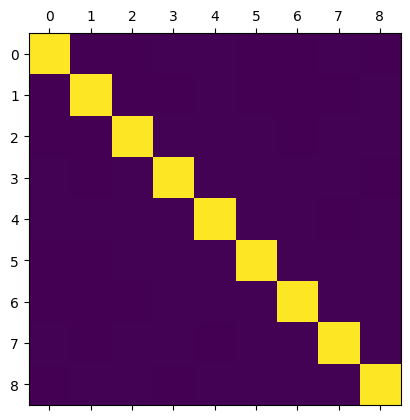

In [ ]:
plt.matshow(X._get_numeric_data().corr())
plt.show()

In [ ]:
pf = PolynomialFeatures(include_bias=False)
Xnum = pf.fit_transform(X._get_numeric_data())
pd.DataFrame(Xnum)

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,56.0,85994.0,50587.0,520.0,80.0,4.0,15.23,36.0,0.44,3136.0,...,16.0,60.92,144.0,1.76,231.9529,548.28,6.7012,1296.0,15.84,0.1936
1,69.0,50432.0,124440.0,458.0,15.0,1.0,4.81,60.0,0.68,4761.0,...,1.0,4.81,60.0,0.68,23.1361,288.60,3.2708,3600.0,40.80,0.4624
2,46.0,84208.0,129188.0,451.0,26.0,3.0,21.17,24.0,0.31,2116.0,...,9.0,63.51,72.0,0.93,448.1689,508.08,6.5627,576.0,7.44,0.0961
3,32.0,31713.0,44799.0,743.0,0.0,3.0,7.07,24.0,0.23,1024.0,...,9.0,21.21,72.0,0.69,49.9849,169.68,1.6261,576.0,5.52,0.0529
4,60.0,20437.0,9139.0,633.0,8.0,4.0,6.51,48.0,0.73,3600.0,...,16.0,26.04,192.0,2.92,42.3801,312.48,4.7523,2304.0,35.04,0.5329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19.0,37979.0,210682.0,541.0,109.0,4.0,14.11,12.0,0.85,361.0,...,16.0,56.44,48.0,3.40,199.0921,169.32,11.9935,144.0,10.20,0.7225
255343,32.0,51953.0,189899.0,511.0,14.0,2.0,11.55,24.0,0.21,1024.0,...,4.0,23.10,48.0,0.42,133.4025,277.20,2.4255,576.0,5.04,0.0441
255344,56.0,84820.0,208294.0,597.0,70.0,3.0,5.29,60.0,0.50,3136.0,...,9.0,15.87,180.0,1.50,27.9841,317.40,2.6450,3600.0,30.00,0.2500
255345,42.0,85109.0,60575.0,809.0,40.0,1.0,20.90,48.0,0.44,1764.0,...,1.0,20.90,48.0,0.44,436.8100,1003.20,9.1960,2304.0,21.12,0.1936


In [ ]:
X = pd.concat([pd.DataFrame(Xnum), X[['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage','HasDependents','LoanPurpose','HasCoSigner']]], axis=1)
X

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56.0,85994.0,50587.0,520.0,80.0,4.0,15.23,36.0,0.44,3136.0,...,1296.0,15.84,0.1936,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,69.0,50432.0,124440.0,458.0,15.0,1.0,4.81,60.0,0.68,4761.0,...,3600.0,40.80,0.4624,Master's,Full-time,Married,No,No,Other,Yes
2,46.0,84208.0,129188.0,451.0,26.0,3.0,21.17,24.0,0.31,2116.0,...,576.0,7.44,0.0961,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,32.0,31713.0,44799.0,743.0,0.0,3.0,7.07,24.0,0.23,1024.0,...,576.0,5.52,0.0529,High School,Full-time,Married,No,No,Business,No
4,60.0,20437.0,9139.0,633.0,8.0,4.0,6.51,48.0,0.73,3600.0,...,2304.0,35.04,0.5329,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19.0,37979.0,210682.0,541.0,109.0,4.0,14.11,12.0,0.85,361.0,...,144.0,10.20,0.7225,Bachelor's,Full-time,Married,No,No,Other,No
255343,32.0,51953.0,189899.0,511.0,14.0,2.0,11.55,24.0,0.21,1024.0,...,576.0,5.04,0.0441,High School,Part-time,Divorced,No,No,Home,No
255344,56.0,84820.0,208294.0,597.0,70.0,3.0,5.29,60.0,0.50,3136.0,...,3600.0,30.00,0.2500,High School,Self-employed,Married,Yes,Yes,Auto,Yes
255345,42.0,85109.0,60575.0,809.0,40.0,1.0,20.90,48.0,0.44,1764.0,...,2304.0,21.12,0.1936,High School,Part-time,Single,Yes,Yes,Other,No


In [ ]:
X = pd.get_dummies(X, drop_first=True)
X

,0,1,2,3,4,5,6,7,8,9,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,56.0,85994.0,50587.0,520.0,80.0,4.0,15.23,36.0,0.44,3136.0,...,0,0,0,1,1,0,0,0,1,1
1,69.0,50432.0,124440.0,458.0,15.0,1.0,4.81,60.0,0.68,4761.0,...,0,1,0,0,0,0,0,0,1,1
2,46.0,84208.0,129188.0,451.0,26.0,3.0,21.17,24.0,0.31,2116.0,...,1,0,0,1,1,0,0,0,0,0
3,32.0,31713.0,44799.0,743.0,0.0,3.0,7.07,24.0,0.23,1024.0,...,0,1,0,0,0,1,0,0,0,0
4,60.0,20437.0,9139.0,633.0,8.0,4.0,6.51,48.0,0.73,3600.0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19.0,37979.0,210682.0,541.0,109.0,4.0,14.11,12.0,0.85,361.0,...,0,1,0,0,0,0,0,0,1,0
255343,32.0,51953.0,189899.0,511.0,14.0,2.0,11.55,24.0,0.21,1024.0,...,0,0,0,0,0,0,0,1,0,0
255344,56.0,84820.0,208294.0,597.0,70.0,3.0,5.29,60.0,0.50,3136.0,...,0,1,0,1,1,0,0,0,0,1
255345,42.0,85109.0,60575.0,809.0,40.0,1.0,20.90,48.0,0.44,1764.0,...,0,0,1,1,1,0,0,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
X.columns = X.columns.astype(str)

### Logistic Regression

In [ ]:
model1 = LogisticRegression(max_iter=10000000000, class_weight = 'balanced')
parameters = {'C':[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1]}
clf = GridSearchCV(model1, parameters, verbose=100, n_jobs=-1, cv=5, scoring = ['f1', 'accuracy'], refit='f1')
clf.fit(X, y)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=10000000000),
             n_jobs=-1, param_grid={'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1]},
             refit='f1', scoring=['f1', 'accuracy'], verbose=100)

In [ ]:
clf.best_params_, clf.best_score_

({'C': 1}, 0.322302013349881)

In [ ]:
model1 = LogisticRegression(max_iter=10000000000, C=1, class_weight = 'balanced')
model1.fit(X_train, y_train)

LogisticRegression(C=1, class_weight='balanced', max_iter=10000000000)

In [ ]:
preds = np.where(model1.predict_proba(X_test)[:,1] > 0.5, 1, 0)
f1_score(y_test, preds), accuracy_score(y_test, preds)

(0.3274212368728121, 0.6990274786241107)

F1 - 0.327 for C=1

Accuracy = 0.7

### Random Forest Classifier

In [ ]:
model2 = RandomForestClassifier(class_weight = 'balanced_subsample')
parameters = {
    'n_estimators': [200, 500],
    #'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    #'criterion' :['gini', 'entropy']
}
clf = GridSearchCV(model2, parameters, verbose=10, n_jobs=1, cv=5, scoring = ['f1', 'accuracy'], refit='f1')
clf.fit(X, y)

In [ ]:
model2 = RandomForestClassifier(class_weight = 'balanced_subsample', n_estimators=500, max_depth=4)
model2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=4,
                       n_estimators=500)

In [ ]:
clf.best_params_, clf.best_score_

({'n_estimators': 500}, 0.056350612247750356)

In [ ]:
clf.predict_proba(X)

array([[0.988, 0.012],
       [0.982, 0.018],
       [0.298, 0.702],
       ...,
       [0.99 , 0.01 ],
       [0.978, 0.022],
       [0.992, 0.008]])

In [ ]:
preds = np.where(model2.predict_proba(X_test)[:,1] > 0.5, 1, 0)
f1_score(y_test, preds), accuracy_score(y_test, preds)

(0.20867775842112032, 0.11649370145551857)

F1 - 0.35 for n-estimators=500 and threshold = 0.175

Accuracy - 0.704

### XGBoost

In [ ]:
device = 'cuda'

In [ ]:
model3 = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42,
    device=device
)
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
clf = GridSearchCV(model3, parameters, verbose=10, n_jobs=1, cv=5, scoring = ['f1', 'accuracy'], refit='f1')
clf.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5; 1/96] START learning_rate=0.1, max_depth=2, n_estimators=60............


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:22:03] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


[CV 1/5; 1/96] END learning_rate=0.1, max_depth=2, n_estimators=60; accuracy: (test=0.886) f1: (test=0.043) total time=   5.1s
[CV 2/5; 1/96] START learning_rate=0.1, max_depth=2, n_estimators=60............
[CV 2/5; 1/96] END learning_rate=0.1, max_depth=2, n_estimators=60; accuracy: (test=0.885) f1: (test=0.037) total time=   1.7s
[CV 3/5; 1/96] START learning_rate=0.1, max_depth=2, n_estimators=60............
[CV 3/5; 1/96] END learning_rate=0.1, max_depth=2, n_estimators=60; accuracy: (test=0.886) f1: (test=0.048) total time=   1.6s
[CV 4/5; 1/96] START learning_rate=0.1, max_depth=2, n_estimators=60............
[CV 4/5; 1/96] END learning_rate=0.1, max_depth=2, n_estimators=60; accuracy: (test=0.886) f1: (test=0.045) total time=   1.6s
[CV 5/5; 1/96] START learning_rate=0.1, max_depth=2, n_estimators=60............
[CV 5/5; 1/96] END learning_rate=0.1, max_depth=2, n_estimators=60; accuracy: (test=0.885) f1: (test=0.041) total time=   1.6s
[CV 1/5; 2/96] START learning_rate=0.1, m

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device='cuda',
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             n_jobs=1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             refit='f1', scoring=['f1', 'accuracy'], verbose=10)

In [ ]:
clf.best_params_, clf.best_score_

({'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 180},
 0.12896478767268332)

In [ ]:
preds = np.where(clf.predict_proba(X_test)[:,1] > 0.18, 1, 0)
f1_score(y_test, preds), accuracy_score(y_test, preds)

(0.3551298424861643, 0.8022583382285752)

F1 - 0.356

Accuracy - 0.8

### kNN Classifier

In [ ]:
model4 = KNeighborsClassifier()
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
parameters = dict(n_neighbors=k_range, weights=weight_options)

clf = GridSearchCV(model4, parameters, verbose=10, n_jobs=1, cv=5, scoring = ['f1', 'accuracy'], refit='f1')
clf.fit(X_train, y_train)

In [ ]:
model4 = KNeighborsClassifier(n_neighbors=20)
model4.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
preds = np.where(model4.predict_proba(X_test)[:,1] > 0.2, 1, 0)
f1_score(y_test, preds), accuracy_score(y_test, preds)

(0.19968780019212296, 0.8259904705959141)

F1 - 0.2

Accuracy - 0.83

# DATASET 2: Water Potability

In [9]:
df2 = pd.read_csv('water_potability_data.csv')
df2.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## LazyFCA (Patternized)

In [11]:
df2 = df2.fillna(df2.mean())
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [12]:
df2.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [13]:
X = df2.drop(['Potability'], axis=1)
y = df2['Potability']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [21]:
bin_cls = fcalc.classifier.PatternBinaryClassifier(X_train.values, y_train.to_numpy(), method = 'standard', alpha=0.1)

In [22]:
bin_cls.predict(X_test.values)
print(accuracy_score(y_test, bin_cls.predictions))
print(f1_score(y_test, bin_cls.predictions))

0.6128048780487805
0.04511278195488722


## LazyFCA (Binarized)

In [23]:
q1 = df2['ph'].quantile(0.25)
q2 = df2['ph'].quantile(0.5)
q3 = df2['ph'].quantile(0.75)
df2['ph25'] = df2['ph'].apply(lambda x: 1 if 0 <= x <= q1 else 0)
df2['ph50'] = df2['ph'].apply(lambda x: 1 if q1 < x <= q2 else 0)
df2['ph75'] = df2['ph'].apply(lambda x: 1 if q2 < x <= q3 else 0)

q1 = df2['Hardness'].quantile(0.25)
q2 = df2['Hardness'].quantile(0.5)
q3 = df2['Hardness'].quantile(0.75)
df2['Hardness25'] = df2['Hardness'].apply(lambda x: 1 if 0 <= x <= q1 else 0)
df2['Hardness50'] = df2['Hardness'].apply(lambda x: 1 if q1 < x <= q2 else 0)
df2['Hardness75'] = df2['Hardness'].apply(lambda x: 1 if q2 < x <= q3 else 0)

q1 = df2['Solids'].quantile(0.25)
q2 = df2['Solids'].quantile(0.5)
q3 = df2['Solids'].quantile(0.75)
df2['Solids25'] = df2['Solids'].apply(lambda x: 1 if 0 <= x <= q1 else 0)
df2['Solids50'] = df2['Solids'].apply(lambda x: 1 if q1 < x <= q2 else 0)
df2['Solids75'] = df2['Solids'].apply(lambda x: 1 if q2 < x <= q3 else 0)

q1 = df2['Chloramines'].quantile(0.25)
q2 = df2['Chloramines'].quantile(0.5)
q3 = df2['Chloramines'].quantile(0.75)
df2['Chloramines25'] = df2['Chloramines'].apply(lambda x: 1 if 0 <= x <= q1 else 0)
df2['Chloramines50'] = df2['Chloramines'].apply(lambda x: 1 if q1 < x <= q2 else 0)
df2['Chloramines75'] = df2['Chloramines'].apply(lambda x: 1 if q2 < x <= q3 else 0)

q1 = df2['Sulfate'].quantile(0.25)
q2 = df2['Sulfate'].quantile(0.5)
q3 = df2['Sulfate'].quantile(0.75)
df2['Sulfate25'] = df2['Sulfate'].apply(lambda x: 1 if 0 <= x <= q1 else 0)
df2['Sulfate50'] = df2['Sulfate'].apply(lambda x: 1 if q1 < x <= q2 else 0)
df2['Sulfate75'] = df2['Sulfate'].apply(lambda x: 1 if q2 < x <= q3 else 0)

q1 = df2['Conductivity'].quantile(0.25)
q2 = df2['Conductivity'].quantile(0.5)
q3 = df2['Conductivity'].quantile(0.75)
df2['Conductivity25'] = df2['Conductivity'].apply(lambda x: 1 if 0 <= x <= q1 else 0)
df2['Conductivity50'] = df2['Conductivity'].apply(lambda x: 1 if q1 < x <= q2 else 0)
df2['Conductivity75'] = df2['Conductivity'].apply(lambda x: 1 if q2 < x <= q3 else 0)

q1 = df2['Organic_carbon'].quantile(0.25)
q2 = df2['Organic_carbon'].quantile(0.5)
q3 = df2['Organic_carbon'].quantile(0.75)
df2['Organic_carbon25'] = df2['Organic_carbon'].apply(lambda x: 1 if 0 <= x <= q1 else 0)
df2['Organic_carbon50'] = df2['Organic_carbon'].apply(lambda x: 1 if q1 < x <= q2 else 0)
df2['Organic_carbon75'] = df2['Organic_carbon'].apply(lambda x: 1 if q2 < x <= q3 else 0)

q1 = df2['Trihalomethanes'].quantile(0.25)
q2 = df2['Trihalomethanes'].quantile(0.5)
q3 = df2['Trihalomethanes'].quantile(0.75)
df2['Trihalomethanes25'] = df2['Trihalomethanes'].apply(lambda x: 1 if 0 <= x <= q1 else 0)
df2['Trihalomethanes50'] = df2['Trihalomethanes'].apply(lambda x: 1 if q1 < x <= q2 else 0)
df2['Trihalomethanes75'] = df2['Trihalomethanes'].apply(lambda x: 1 if q2 < x <= q3 else 0)

q1 = df2['Turbidity'].quantile(0.25)
q2 = df2['Turbidity'].quantile(0.5)
q3 = df2['Turbidity'].quantile(0.75)
df2['Turbidity25'] = df2['Turbidity'].apply(lambda x: 1 if 0 <= x <= q1 else 0)
df2['Turbidity50'] = df2['Turbidity'].apply(lambda x: 1 if q1 < x <= q2 else 0)
df2['Turbidity75'] = df2['Turbidity'].apply(lambda x: 1 if q2 < x <= q3 else 0)

df2.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,...,Conductivity75,Organic_carbon25,Organic_carbon50,Organic_carbon75,Trihalomethanes25,Trihalomethanes50,Trihalomethanes75,Turbidity25,Turbidity50,Turbidity75
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,...,0,1,0,0,0,0,0,1,0,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0,...,0,0,0,1,1,0,0,0,0,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0,...,0,0,0,0,0,0,1,1,0,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,...,0,0,0,0,0,0,0,0,0,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,...,0,1,0,0,1,0,0,0,0,1
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0,...,0,1,0,0,1,0,0,1,0,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0,...,0,0,1,0,0,0,0,1,0,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0,...,1,0,1,0,0,1,0,0,0,1
8,7.080795,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0,...,0,0,1,0,1,0,0,0,1,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0,...,0,0,0,0,0,0,1,0,0,1


In [24]:
X = df2.drop(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'], axis=1)
y = df2['Potability']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
bin_cls = fcalc.classifier.BinarizedBinaryClassifier(X_train.values, y_train.to_numpy(), method="standard", alpha=0.1)

In [37]:
bin_cls.predict(X_test.values)
print(accuracy_score(y_test, bin_cls.predictions))
print(f1_score(y_test, bin_cls.predictions))

0.5594512195121951
0.42084168336673344


## Classical ML Models

In [ ]:
df2 = pd.read_csv('water_potability_data.csv')
df2.head()

In [ ]:
df2 = df2.fillna(df2.mean())
df2.info()

In [ ]:
X = df2.drop(['Potability'], axis=1)
y = df2['Potability']

In [ ]:
pf = PolynomialFeatures(include_bias=False)
X = pf.fit_transform(X._get_numeric_data())
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,50.137651,...,318444.257174,5857.401419,49089.757466,1672.122939,107.739897,902.947403,30.756702,7567.428942,257.766022,8.780171
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,13.809251,...,351513.049076,9000.007528,33396.684623,2668.373212,230.432798,855.076117,68.320021,3172.964835,253.517811,20.255907
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,65.595813,...,175231.161616,7061.316225,27803.863398,1279.232854,284.550912,1120.416425,51.549437,4411.628689,202.975402,9.338731
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,69.168595,...,131962.561766,6697.372024,36450.770473,1681.477347,339.905435,1849.951737,85.338441,10068.451614,464.458586,21.425517
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,82.668527,...,158731.176220,4604.943514,12748.346309,1623.554115,133.593824,369.841742,47.100861,1023.871539,130.394234,16.606240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,21.791173,...,277122.407731,7314.357749,35106.014438,2335.123345,193.054866,926.586741,61.633152,4447.248636,295.814671,19.676507
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,60.978232,...,154016.672501,7811.012355,26057.197252,1098.169227,396.138373,1321.500370,55.694057,4408.467717,185.792952,7.830163
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,88.727175,...,186662.694557,4769.372468,30176.340816,1425.261949,121.861060,771.028241,36.416517,4878.379942,230.411280,10.882580
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,26.283698,...,162314.802839,4499.779824,31218.692525,1897.038982,124.745360,865.461685,52.590753,6004.423170,364.865531,22.171465


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
X.columns = X.columns.astype(str)

### kNN Classifier

In [ ]:
model = KNeighborsClassifier()
k_range = list(range(1, 31))
weight_options = 'uniform'
parameters = dict(n_neighbors=k_range)

clf = GridSearchCV(model, parameters, verbose=10, n_jobs=1, cv=5, scoring = ['f1', 'accuracy'], refit='f1')
clf.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5; 1/30] START n_neighbors=1..............................................
[CV 1/5; 1/30] END n_neighbors=1; accuracy: (test=0.546) f1: (test=0.420) total time=   0.0s
[CV 2/5; 1/30] START n_neighbors=1..............................................
[CV 2/5; 1/30] END n_neighbors=1; accuracy: (test=0.563) f1: (test=0.420) total time=   0.0s
[CV 3/5; 1/30] START n_neighbors=1..............................................
[CV 3/5; 1/30] END n_neighbors=1; accuracy: (test=0.519) f1: (test=0.367) total time=   0.0s
[CV 4/5; 1/30] START n_neighbors=1..............................................
[CV 4/5; 1/30] END n_neighbors=1; accuracy: (test=0.544) f1: (test=0.430) total time=   0.0s
[CV 5/5; 1/30] START n_neighbors=1..............................................
[CV 5/5; 1/30] END n_neighbors=1; accuracy: (test=0.521) f1: (test=0.371) total time=   0.0s
[CV 1/5; 2/30] START n_neighbors=2..................................

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             refit='f1', scoring=['f1', 'accuracy'], verbose=10)

In [ ]:
clf.best_params_, clf.best_score_

({'n_neighbors': 1}, 0.4014242241810592)

In [ ]:
model = KNeighborsClassifier(n_neighbors = 2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
preds = np.where(model.predict_proba(X_test)[:,1] > 0.25, 1, 0)
f1_score(y_test, preds), accuracy_score(y_test, preds)

(0.45354330708661417, 0.47103658536585363)

In [ ]:
model = KNeighborsClassifier(n_neighbors = 35)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=35)

In [ ]:
model.predict_proba(X_test)

array([[0.71428571, 0.28571429],
       [0.65714286, 0.34285714],
       [0.65714286, 0.34285714],
       ...,
       [0.6       , 0.4       ],
       [0.65714286, 0.34285714],
       [0.57142857, 0.42857143]])

In [ ]:
preds = np.where(model.predict_proba(X_test)[:,1] > 0.5, 1, 0)
f1_score(y_test, preds), accuracy_score(y_test, preds)

(0.17532467532467536, 0.6128048780487805)

For n_neighbors = 35:

F1 - 0.18

Accuracy - 0.61

### Logistic Regression

In [ ]:
model2 = LogisticRegression(max_iter=10000000000, class_weight = 'balanced')
parameters = {'C':[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1]}
clf = GridSearchCV(model2, parameters, verbose=100, n_jobs=1, cv=5, scoring = ['f1', 'accuracy'], refit='f1')
clf.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5; 1/7] START C=0.2.......................................................
[CV 1/5; 1/7] END C=0.2; accuracy: (test=0.536) f1: (test=0.456) total time=   0.1s
[CV 2/5; 1/7] START C=0.2.......................................................
[CV 2/5; 1/7] END C=0.2; accuracy: (test=0.571) f1: (test=0.463) total time=   0.2s
[CV 3/5; 1/7] START C=0.2.......................................................
[CV 3/5; 1/7] END C=0.2; accuracy: (test=0.546) f1: (test=0.396) total time=   0.0s
[CV 4/5; 1/7] START C=0.2.......................................................
[CV 4/5; 1/7] END C=0.2; accuracy: (test=0.557) f1: (test=0.380) total time=   0.0s
[CV 5/5; 1/7] START C=0.2.......................................................
[CV 5/5; 1/7] END C=0.2; accuracy: (test=0.529) f1: (test=0.432) total time=   0.0s
[CV 1/5; 2/7] START C=0.3.......................................................
[CV 1/5; 2/7] END C=0.3; accuracy:

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=10000000000),
             n_jobs=1, param_grid={'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1]},
             refit='f1', scoring=['f1', 'accuracy'], verbose=100)

In [ ]:
clf.best_params_, clf.best_score_

({'C': 0.5}, 0.42726180539896524)

In [ ]:
preds = np.where(clf.predict_proba(X_test)[:,1] > 0.5, 1, 0)
f1_score(y_test, preds), accuracy_score(y_test, preds)

(0.3456221198156682, 0.5670731707317073)

F1 - 0.34

Accuracy - 0.56

### Random Forest Classifier

In [ ]:
model3 = RandomForestClassifier(class_weight = 'balanced_subsample')
parameters = {
    'n_estimators': [200, 500],
    #'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,8,None],
    #'criterion' :['gini', 'entropy']
}
clf = GridSearchCV(model3, parameters, verbose=10, n_jobs=1, cv=5, scoring = ['f1', 'accuracy'], refit='f1')
clf.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START max_depth=4, n_estimators=200...............................
[CV 1/5; 1/6] END max_depth=4, n_estimators=200; accuracy: (test=0.660) f1: (test=0.491) total time=   1.4s
[CV 2/5; 1/6] START max_depth=4, n_estimators=200...............................
[CV 2/5; 1/6] END max_depth=4, n_estimators=200; accuracy: (test=0.645) f1: (test=0.513) total time=   2.5s
[CV 3/5; 1/6] START max_depth=4, n_estimators=200...............................
[CV 3/5; 1/6] END max_depth=4, n_estimators=200; accuracy: (test=0.622) f1: (test=0.476) total time=   2.2s
[CV 4/5; 1/6] START max_depth=4, n_estimators=200...............................
[CV 4/5; 1/6] END max_depth=4, n_estimators=200; accuracy: (test=0.628) f1: (test=0.509) total time=   1.6s
[CV 5/5; 1/6] START max_depth=4, n_estimators=200...............................
[CV 5/5; 1/6] END max_depth=4, n_estimators=200; accuracy: (test=0.624) f1: (test=0.518) total time=   

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced_subsample'),
             n_jobs=1,
             param_grid={'max_depth': [4, 8, None], 'n_estimators': [200, 500]},
             refit='f1', scoring=['f1', 'accuracy'], verbose=10)

In [ ]:
clf.best_params_, clf.best_score_

({'max_depth': 8, 'n_estimators': 500}, 0.5062894856525254)

In [ ]:
preds = np.where(clf.predict_proba(X_test)[:,1] > 0.48, 1, 0)
f1_score(y_test, preds), accuracy_score(y_test, preds)

(0.5870445344129555, 0.6890243902439024)

F1 - 0.58

Accuracy - 0.69

### XGBoost

In [ ]:
model4 = XGBClassifier(
    objective= 'binary:logistic',
    #nthread=4,
    seed=42,
    device=device
)
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
clf = GridSearchCV(model4, parameters, verbose=10, n_jobs=1, cv=5, scoring = ['f1', 'accuracy'], refit='f1')
clf.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5; 1/96] START learning_rate=0.1, max_depth=2, n_estimators=60............
[CV 1/5; 1/96] END learning_rate=0.1, max_depth=2, n_estimators=60; accuracy: (test=0.647) f1: (test=0.291) total time=   0.1s
[CV 2/5; 1/96] START learning_rate=0.1, max_depth=2, n_estimators=60............
[CV 2/5; 1/96] END learning_rate=0.1, max_depth=2, n_estimators=60; accuracy: (test=0.647) f1: (test=0.342) total time=   0.2s
[CV 3/5; 1/96] START learning_rate=0.1, max_depth=2, n_estimators=60............
[CV 3/5; 1/96] END learning_rate=0.1, max_depth=2, n_estimators=60; accuracy: (test=0.651) f1: (test=0.330) total time=   0.4s
[CV 4/5; 1/96] START learning_rate=0.1, max_depth=2, n_estimators=60............
[CV 4/5; 1/96] END learning_rate=0.1, max_depth=2, n_estimators=60; accuracy: (test=0.641) f1: (test=0.373) total time=   0.4s
[CV 5/5; 1/96] START learning_rate=0.1, max_depth=2, n_estimators=60............
[CV 5/5; 1/96] END learni

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device='cuda',
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             refit='f1', scoring=['f1', 'accuracy'], verbose=10)

In [ ]:
clf.best_params_, clf.best_score_

({'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100},
 0.49991771594338097)

In [ ]:
preds = np.where(clf.predict_proba(X_test)[:,1] > 0.35, 1, 0)
f1_score(y_test, preds), accuracy_score(y_test, preds)

(0.5918003565062389, 0.6509146341463414)

F1 - 0.59

Accuracy - 0.65

# DATASET 3: Strokes

In [11]:
df3 = pd.read_csv('healthcare-dataset-stroke-datatable.csv')
df3.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [39]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## LazyFCA (Patternized)

In [12]:
df3 = df3.fillna(df3.mean())
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<ipython-input-12-ba8de3aafd62>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3 = df3.fillna(df3.mean())


In [ ]:
df3.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [13]:
X = df3.drop(['id', 'stroke'], axis=1)
y = df3['stroke']

In [ ]:
X = pd.get_dummies(X, drop_first=True)
X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
bin_cls = fcalc.classifier.PatternBinaryClassifier(X_train.values, y_train.to_numpy(), method = 'standard', alpha=0.1)

In [ ]:
bin_cls.predict(X_test.values)
print(accuracy_score(y_test, bin_cls.predictions))
print(f1_score(y_test, bin_cls.predictions))

## LazyFCA (Binarized)

In [14]:
df3['Age25'] = df3['age'].apply(lambda x: 1 if 0 <= x <= 25 else 0)
df3['Age40'] = df3['age'].apply(lambda x: 1 if 25 < x <= 40 else 0)
df3['Age60'] = df3['age'].apply(lambda x: 1 if 40 < x <= 60 else 0)

q1 = df3['avg_glucose_level'].quantile(0.25)
q2 = df3['avg_glucose_level'].quantile(0.5)
q3 = df3['avg_glucose_level'].quantile(0.75)
df3['avg_glucose_level25'] = df3['avg_glucose_level'].apply(lambda x: 1 if 0 <= x <= q1 else 0)
df3['avg_glucose_level50'] = df3['avg_glucose_level'].apply(lambda x: 1 if q1 < x <= q2 else 0)
df3['avg_glucose_level75'] = df3['avg_glucose_level'].apply(lambda x: 1 if q2 < x <= q3 else 0)

q1 = df3['bmi'].quantile(0.25)
q2 = df3['bmi'].quantile(0.5)
q3 = df3['bmi'].quantile(0.75)
df3['bmi25'] = df3['bmi'].apply(lambda x: 1 if 0 <= x <= q1 else 0)
df3['bmi50'] = df3['bmi'].apply(lambda x: 1 if q1 < x <= q2 else 0)
df3['bmi75'] = df3['bmi'].apply(lambda x: 1 if q2 < x <= q3 else 0)

df3.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,stroke,Age25,Age40,Age60,avg_glucose_level25,avg_glucose_level50,avg_glucose_level75,bmi25,bmi50,bmi75
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,...,1,0,0,0,0,0,0,0,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,...,1,0,0,0,0,0,0,0,0,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,...,1,0,0,0,0,0,1,0,0,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,...,1,0,0,1,0,0,0,0,0,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,...,1,0,0,0,0,0,0,0,1,0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,...,1,0,0,0,0,0,0,0,0,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,...,1,0,0,0,1,0,0,0,1,0
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,...,1,0,0,0,0,0,1,1,0,0
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,...,1,0,0,1,1,0,0,0,0,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,...,1,0,0,0,1,0,0,0,1,0


In [15]:
X = df3.drop(['stroke', 'age', 'avg_glucose_level', 'bmi'], axis=1)
y = df3['stroke']

In [16]:
X = pd.get_dummies(X, drop_first=True)
X

,id,hypertension,heart_disease,Age25,Age40,Age60,avg_glucose_level25,avg_glucose_level50,avg_glucose_level75,bmi25,...,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0
1,51676,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,31112,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
3,60182,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1
4,1665,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,1,0
5106,44873,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
5107,19723,0,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
5108,37544,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
bin_cls = fcalc.classifier.BinarizedBinaryClassifier(X_train.values, y_train.to_numpy(), method='standard', alpha=0.1)

In [19]:
bin_cls.predict(X_test.values)

In [21]:
bin_cls.predictions[:100]

array([ 1., -1.,  0.,  1.,  1.,  1.,  0.,  1., -1.,  1.,  1., -1., -1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  1., -1.,  1., -1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  0., -1.,  1., -1.,  1.,  1.,  1., -1.,
        1.,  1.,  0., -1., -1., -1., -1.,  0.,  1.,  1.,  1.,  0.,  1.,
        1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1., -1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,
        1., -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,
       -1., -1., -1.,  1., -1.,  1., -1.,  0.,  1.])

In [22]:
preds = bin_cls.predictions
predsindices = np.where(preds == -1)[0]
new_values = np.random.choice([0, 1], size=len(predsindices))
preds[predsindices] = new_values
preds

array([1., 1., 0., ..., 1., 0., 0.])

In [ ]:
print(accuracy_score(y_test, preds))
print(f1_score(y_test, preds))

In [54]:
bin_cls.predictions

array([ 1., -1.,  0., ..., -1.,  0.,  0.])

## Classical ML Models

In [ ]:
df3 = pd.read_csv('healthcare-dataset-stroke-datatable.csv')
df3.head()

In [ ]:
df3 = df3.fillna(df3.mean())
df3.info()

In [ ]:
X = df3.drop(['id', 'stroke'], axis=1)
y = df3['stroke']

In [ ]:
pf = PolynomialFeatures(include_bias=False)
Xnum = pf.fit_transform(X._get_numeric_data())
Xnum = pd.DataFrame(Xnum)
Xnum

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,9046.0,67.0,0.0,1.0,228.69,36.600000,8.183012e+07,606082.0,0.0,9046.0,...,0.0,0.0,0.00,0.000000,1.0,228.69,36.6,52299.1161,8370.054000,1339.560000
1,51676.0,61.0,0.0,0.0,202.21,28.893237,2.670409e+09,3152236.0,0.0,0.0,...,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,40888.8841,5842.501436,834.819139
2,31112.0,80.0,0.0,1.0,105.92,32.500000,9.679565e+08,2488960.0,0.0,31112.0,...,0.0,0.0,0.00,0.000000,1.0,105.92,32.5,11219.0464,3442.400000,1056.250000
3,60182.0,49.0,0.0,0.0,171.23,34.400000,3.621873e+09,2948918.0,0.0,0.0,...,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,29319.7129,5890.312000,1183.360000
4,1665.0,79.0,1.0,0.0,174.12,24.000000,2.772225e+06,131535.0,1665.0,0.0,...,1.0,0.0,174.12,24.000000,0.0,0.00,0.0,30317.7744,4178.880000,576.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234.0,80.0,1.0,0.0,83.75,28.893237,3.324788e+08,1458720.0,18234.0,0.0,...,1.0,0.0,83.75,28.893237,0.0,0.00,0.0,7014.0625,2419.808591,834.819139
5106,44873.0,81.0,0.0,0.0,125.20,40.000000,2.013586e+09,3634713.0,0.0,0.0,...,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,15675.0400,5008.000000,1600.000000
5107,19723.0,35.0,0.0,0.0,82.99,30.600000,3.889967e+08,690305.0,0.0,0.0,...,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,6887.3401,2539.494000,936.360000
5108,37544.0,51.0,0.0,0.0,166.29,25.600000,1.409552e+09,1914744.0,0.0,0.0,...,0.0,0.0,0.00,0.000000,0.0,0.00,0.0,27652.3641,4257.024000,655.360000


In [ ]:
X = pd.concat([pd.DataFrame(Xnum), X[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]], axis=1)
X

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,gender,ever_married,work_type,Residence_type,smoking_status
0,9046.0,67.0,0.0,1.0,228.69,36.600000,8.183012e+07,606082.0,0.0,9046.0,...,228.69,36.6,52299.1161,8370.054000,1339.560000,Male,Yes,Private,Urban,formerly smoked
1,51676.0,61.0,0.0,0.0,202.21,28.893237,2.670409e+09,3152236.0,0.0,0.0,...,0.00,0.0,40888.8841,5842.501436,834.819139,Female,Yes,Self-employed,Rural,never smoked
2,31112.0,80.0,0.0,1.0,105.92,32.500000,9.679565e+08,2488960.0,0.0,31112.0,...,105.92,32.5,11219.0464,3442.400000,1056.250000,Male,Yes,Private,Rural,never smoked
3,60182.0,49.0,0.0,0.0,171.23,34.400000,3.621873e+09,2948918.0,0.0,0.0,...,0.00,0.0,29319.7129,5890.312000,1183.360000,Female,Yes,Private,Urban,smokes
4,1665.0,79.0,1.0,0.0,174.12,24.000000,2.772225e+06,131535.0,1665.0,0.0,...,0.00,0.0,30317.7744,4178.880000,576.000000,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234.0,80.0,1.0,0.0,83.75,28.893237,3.324788e+08,1458720.0,18234.0,0.0,...,0.00,0.0,7014.0625,2419.808591,834.819139,Female,Yes,Private,Urban,never smoked
5106,44873.0,81.0,0.0,0.0,125.20,40.000000,2.013586e+09,3634713.0,0.0,0.0,...,0.00,0.0,15675.0400,5008.000000,1600.000000,Female,Yes,Self-employed,Urban,never smoked
5107,19723.0,35.0,0.0,0.0,82.99,30.600000,3.889967e+08,690305.0,0.0,0.0,...,0.00,0.0,6887.3401,2539.494000,936.360000,Female,Yes,Self-employed,Rural,never smoked
5108,37544.0,51.0,0.0,0.0,166.29,25.600000,1.409552e+09,1914744.0,0.0,0.0,...,0.00,0.0,27652.3641,4257.024000,655.360000,Male,Yes,Private,Rural,formerly smoked


In [ ]:
X = pd.get_dummies(X, drop_first=True)
X

,0,1,2,3,4,5,6,7,8,9,...,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046.0,67.0,0.0,1.0,228.69,36.600000,8.183012e+07,606082.0,0.0,9046.0,...,0,1,0,1,0,0,1,1,0,0
1,51676.0,61.0,0.0,0.0,202.21,28.893237,2.670409e+09,3152236.0,0.0,0.0,...,0,1,0,0,1,0,0,0,1,0
2,31112.0,80.0,0.0,1.0,105.92,32.500000,9.679565e+08,2488960.0,0.0,31112.0,...,0,1,0,1,0,0,0,0,1,0
3,60182.0,49.0,0.0,0.0,171.23,34.400000,3.621873e+09,2948918.0,0.0,0.0,...,0,1,0,1,0,0,1,0,0,1
4,1665.0,79.0,1.0,0.0,174.12,24.000000,2.772225e+06,131535.0,1665.0,0.0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234.0,80.0,1.0,0.0,83.75,28.893237,3.324788e+08,1458720.0,18234.0,0.0,...,0,1,0,1,0,0,1,0,1,0
5106,44873.0,81.0,0.0,0.0,125.20,40.000000,2.013586e+09,3634713.0,0.0,0.0,...,0,1,0,0,1,0,1,0,1,0
5107,19723.0,35.0,0.0,0.0,82.99,30.600000,3.889967e+08,690305.0,0.0,0.0,...,0,1,0,0,1,0,0,0,1,0
5108,37544.0,51.0,0.0,0.0,166.29,25.600000,1.409552e+09,1914744.0,0.0,0.0,...,0,1,0,1,0,0,0,1,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
X.columns = X.columns.astype(str)

### kNN Classifier

In [ ]:
model = KNeighborsClassifier()
k_range = list(range(1, 31))
#weight_options = 'uniform'
parameters = dict(n_neighbors=k_range)

clf = GridSearchCV(model, parameters, verbose=10, n_jobs=1, cv=5, scoring = ['f1', 'accuracy'], refit='f1')
clf.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5; 1/30] START n_neighbors=1..............................................
[CV 1/5; 1/30] END n_neighbors=1; accuracy: (test=0.924) f1: (test=0.114) total time=   0.1s
[CV 2/5; 1/30] START n_neighbors=1..............................................
[CV 2/5; 1/30] END n_neighbors=1; accuracy: (test=0.923) f1: (test=0.000) total time=   0.1s
[CV 3/5; 1/30] START n_neighbors=1..............................................
[CV 3/5; 1/30] END n_neighbors=1; accuracy: (test=0.933) f1: (test=0.068) total time=   0.1s
[CV 4/5; 1/30] START n_neighbors=1..............................................
[CV 4/5; 1/30] END n_neighbors=1; accuracy: (test=0.917) f1: (test=0.029) total time=   0.1s
[CV 5/5; 1/30] START n_neighbors=1..............................................
[CV 5/5; 1/30] END n_neighbors=1; accuracy: (test=0.918) f1: (test=0.029) total time=   0.1s
[CV 1/5; 2/30] START n_neighbors=2..................................

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             refit='f1', scoring=['f1', 'accuracy'], verbose=10)

In [ ]:
clf.best_params_, clf.best_score_

({'n_neighbors': 1}, 0.04792785205460224)

In [ ]:
preds = np.where(clf.predict_proba(X_test)[:,1] > 0.2, 1, 0)
f1_score(y_test, preds), accuracy_score(y_test, preds)

(0.059405940594059396, 0.9070450097847358)

In [ ]:
model = KNeighborsClassifier(n_neighbors = 15)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
preds = np.where(model.predict_proba(X_test)[:,1] > 0.07, 1, 0)
f1_score(y_test, preds), accuracy_score(y_test, preds)

(0.10837438423645321, 0.8228962818003914)

F1 - 0.108

Accuracy - 0.822

### Logistic Regression

In [ ]:
model2 = LogisticRegression(max_iter=10000000000, class_weight = 'balanced')
parameters = {'C':[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1]}
clf = GridSearchCV(model2, parameters, verbose=100, n_jobs=1, cv=5, scoring = ['f1', 'accuracy'], refit='f1')
clf.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5; 1/7] START C=0.2.......................................................
[CV 1/5; 1/7] END C=0.2; accuracy: (test=0.647) f1: (test=0.142) total time=   0.0s
[CV 2/5; 1/7] START C=0.2.......................................................
[CV 2/5; 1/7] END C=0.2; accuracy: (test=0.644) f1: (test=0.194) total time=   0.0s
[CV 3/5; 1/7] START C=0.2.......................................................
[CV 3/5; 1/7] END C=0.2; accuracy: (test=0.575) f1: (test=0.167) total time=   0.0s
[CV 4/5; 1/7] START C=0.2.......................................................
[CV 4/5; 1/7] END C=0.2; accuracy: (test=0.607) f1: (test=0.166) total time=   0.0s
[CV 5/5; 1/7] START C=0.2.......................................................
[CV 5/5; 1/7] END C=0.2; accuracy: (test=0.601) f1: (test=0.177) total time=   0.0s
[CV 1/5; 2/7] START C=0.3.......................................................
[CV 1/5; 2/7] END C=0.3; accuracy:

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=10000000000),
             n_jobs=1, param_grid={'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1]},
             refit='f1', scoring=['f1', 'accuracy'], verbose=100)

In [ ]:
clf.best_params_, clf.best_score_

({'C': 0.2}, 0.16936092188597185)

In [ ]:
preds = np.where(clf.predict_proba(X_test)[:,1] >= 0.7, 1, 0)
f1_score(y_test, preds), accuracy_score(y_test, preds)

(0.273224043715847, 0.8698630136986302)

F1 - 0.273

Accuracy - 0.87

### Random Forest Classifier

In [ ]:
model3 = RandomForestClassifier(class_weight = 'balanced_subsample')
parameters = {
    'n_estimators': [200, 500],
    #'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,6,8,None],
    #'criterion' :['gini', 'entropy']
}
clf = GridSearchCV(model3, parameters, verbose=10, n_jobs=1, cv=5, scoring = ['f1', 'accuracy'], refit='f1')
clf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START max_depth=4, n_estimators=200...............................
[CV 1/5; 1/8] END max_depth=4, n_estimators=200; accuracy: (test=0.718) f1: (test=0.189) total time=   1.4s
[CV 2/5; 1/8] START max_depth=4, n_estimators=200...............................
[CV 2/5; 1/8] END max_depth=4, n_estimators=200; accuracy: (test=0.722) f1: (test=0.192) total time=   1.6s
[CV 3/5; 1/8] START max_depth=4, n_estimators=200...............................
[CV 3/5; 1/8] END max_depth=4, n_estimators=200; accuracy: (test=0.730) f1: (test=0.214) total time=   1.9s
[CV 4/5; 1/8] START max_depth=4, n_estimators=200...............................
[CV 4/5; 1/8] END max_depth=4, n_estimators=200; accuracy: (test=0.763) f1: (test=0.236) total time=   1.2s
[CV 5/5; 1/8] START max_depth=4, n_estimators=200...............................
[CV 5/5; 1/8] END max_depth=4, n_estimators=200; accuracy: (test=0.761) f1: (test=0.217) total time=   

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced_subsample'),
             n_jobs=1,
             param_grid={'max_depth': [4, 6, 8, None],
                         'n_estimators': [200, 500]},
             refit='f1', scoring=['f1', 'accuracy'], verbose=10)

In [ ]:
clf.best_params_, clf.best_score_

({'max_depth': 6, 'n_estimators': 200}, 0.2216267466579042)

In [ ]:
preds = np.where(clf.predict_proba(X_test)[:,1] >= 0.4, 1, 0)
f1_score(y_test, preds), accuracy_score(y_test, preds)

(0.26666666666666666, 0.7416829745596869)

F1 - 0.27

Accuracy - 0.75

### XGBoost

In [ ]:
model4 = XGBClassifier(
    objective= 'binary:logistic',
    #nthread=4,
    seed=42,
    device=device
)
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
clf = GridSearchCV(model4, parameters, verbose=10, n_jobs=1, cv=5, scoring = ['f1', 'accuracy'], refit='f1')
clf.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5; 1/96] START learning_rate=0.1, max_depth=2, n_estimators=60............
[CV 1/5; 1/96] END learning_rate=0.1, max_depth=2, n_estimators=60; accuracy: (test=0.955) f1: (test=0.000) total time=   0.1s
[CV 2/5; 1/96] START learning_rate=0.1, max_depth=2, n_estimators=60............
[CV 2/5; 1/96] END learning_rate=0.1, max_depth=2, n_estimators=60; accuracy: (test=0.954) f1: (test=0.000) total time=   0.1s
[CV 3/5; 1/96] START learning_rate=0.1, max_depth=2, n_estimators=60............
[CV 3/5; 1/96] END learning_rate=0.1, max_depth=2, n_estimators=60; accuracy: (test=0.954) f1: (test=0.000) total time=   0.1s
[CV 4/5; 1/96] START learning_rate=0.1, max_depth=2, n_estimators=60............
[CV 4/5; 1/96] END learning_rate=0.1, max_depth=2, n_estimators=60; accuracy: (test=0.955) f1: (test=0.000) total time=   0.2s
[CV 5/5; 1/96] START learning_rate=0.1, max_depth=2, n_estimators=60............
[CV 5/5; 1/96] END learni

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device='cuda',
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             refit='f1', scoring=['f1', 'accuracy'], verbose=10)

In [ ]:
clf.best_params_, clf.best_score_

({'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 180},
 0.07235959187425314)

In [ ]:
preds = np.where(clf.predict_proba(X_test)[:,1] >= 0.1, 1, 0)
f1_score(y_test, preds), accuracy_score(y_test, preds)

(0.31506849315068497, 0.9021526418786693)

F1 - 0.32

Accuracy - 0.9